In [1]:
import pickle as p

In [2]:
(t, co2_ts, co2_pred, co2_erfc_pred, b) = p.load(open('results/ec_time_series.p', 'rb'))
(my_network, my_time_series) = p.load(open('data/GPSDataRegional.p', 'rb'))

In [3]:
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
from plotting import plot_uplift
from gpsutils import vertical_displacements_for_date_from_timeseries, apply_filter_to_all_time_series, check_for_nodata_at_date, subsample_time_series_in_interval
import numpy as np
from datetime import datetime

In [4]:
zero_date = datetime(2016, 8, 1)
from filters import reference_to_date

myfilter = reference_to_date(zero_date)

apply_filter_to_all_time_series(myfilter, my_time_series, field_name_prefix = 'filtered_zeroed', operation_field_prefix = 'filtered')


In [5]:
def plot_animation_frame(fig, date):
    [lons, lats, uzs] = vertical_displacements_for_date_from_timeseries(np.datetime64(date), my_time_series, my_network, field_prefix = 'filtered_zeroed')
    gs = GridSpec(2, 1, height_ratios=[7, 2])
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    plt.sca(ax1)
    plot_uplift(lons, lats, uzs, hillshade = 'data/SierrasHillshade.tif', extent = [-121.8,-117.7,36.23,39.34], value_range = np.array([-0.03, 0.03]))
    plt.sca(ax2)
    plt.plot(t, co2_ts,'k.')
    plt.plot(t, co2_pred,'g-')
    plt.plot(t, co2_erfc_pred + b, 'r-')
    plt.plot([date, date], [-1000, 6200], 'b-', linewidth = 3)
    ax1.set_position(gs[0].get_position(fig))
    ax2.set_position(gs[1].get_position(fig))
    ax1.set_anchor("W")
    ax2.set_anchor("W")


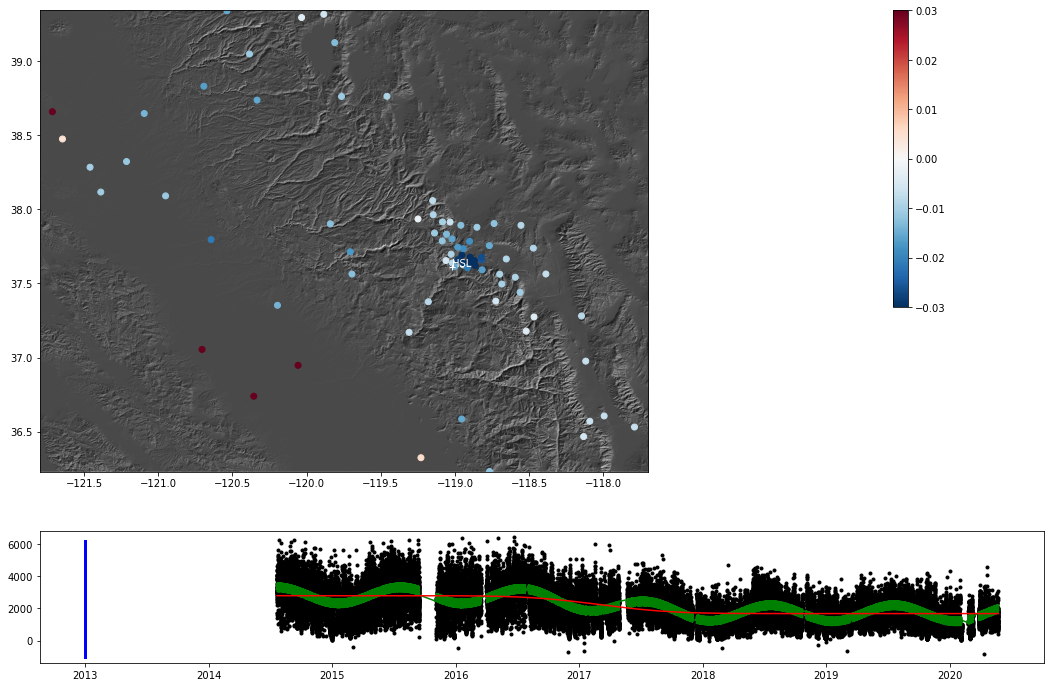

In [6]:
from datetime import datetime

fig = plt.figure()
fig.set_size_inches(18, 12)
plot_animation_frame(fig, datetime(2013, 1, 1))

In [7]:
from utils import daterange
from matplotlib.animation import FFMpegWriter

metadata = dict(title='Vertical Displacement and EC Flux Animation', artist='George Hilley',
                comment='Animation to relate uplift across Sierras to gas efflux at HSL')
writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure()
fig.set_size_inches(18, 12)

min_t = datetime(2014, 7, 22)
max_t = datetime(2020, 5, 24)
last_month = datetime.month

with writer.saving(fig, "results/UpliftECFluxAnimationSierras.mp4", dpi = 100):
    for time in daterange(min_t, max_t):
        plot_animation_frame(fig, time)
        writer.grab_frame()
        fig.clf()
        if time.month != last_month:
            print(time)
            last_month = time.month

2014-07-22 00:00:00
2014-08-01 00:00:00
2014-09-01 00:00:00
2014-10-01 00:00:00
2014-11-01 00:00:00
2014-12-01 00:00:00
2015-01-01 00:00:00
2015-02-01 00:00:00
2015-03-01 00:00:00
2015-04-01 00:00:00
2015-05-01 00:00:00
2015-06-01 00:00:00
2015-07-01 00:00:00
2015-08-01 00:00:00
2015-09-01 00:00:00
2015-10-01 00:00:00
2015-11-01 00:00:00
2015-12-01 00:00:00
2016-01-01 00:00:00
2016-02-01 00:00:00
2016-03-01 00:00:00
2016-04-01 00:00:00
2016-05-01 00:00:00
2016-06-01 00:00:00
2016-07-01 00:00:00
2016-08-01 00:00:00
2016-09-01 00:00:00
2016-10-01 00:00:00
2016-11-01 00:00:00
2016-12-01 00:00:00
2017-01-01 00:00:00
2017-02-01 00:00:00
2017-03-01 00:00:00
2017-04-01 00:00:00
2017-05-01 00:00:00
2017-06-01 00:00:00
2017-07-01 00:00:00
2017-08-01 00:00:00
2017-09-01 00:00:00
2017-10-01 00:00:00
2017-11-01 00:00:00
2017-12-01 00:00:00
2018-01-01 00:00:00
2018-02-01 00:00:00
2018-03-01 00:00:00
2018-04-01 00:00:00
2018-05-01 00:00:00
2018-06-01 00:00:00
2018-07-01 00:00:00
2018-08-01 00:00:00


<Figure size 1296x864 with 0 Axes>